You'll need to install it using: `pip install scikit-learn`. Every algorithm is exposed in `scikit-learn` via an "Estimator".

First, you'll import the model, the general form is:
```python
from sklearn.'family' import 'Model'
```

For example:

In [2]:
from sklearn.linear_model import LinearRegression

**Estimator parameters:** All the parameters of an estimator can be set when it is instantiated, and have suitable default values. For example:

In [3]:
model = LinearRegression()
print(model)

LinearRegression()


In [4]:
LinearRegression(copy_X=True, fit_intercept=True)

LinearRegression()

Once you have your model created with your parameters, it is time to fit your model on some data! But remember, we should split this data into training set and a test set.

Let's go over example of how can we do that. We'll `import numpy as np` to create some fake data, then we can use `sklearn.model_selection` to do a `train_test_split` to splitting our data into a training dataset and a testing set. We're have then our sets of data `X` and `y`, `X` are the actual features and `y` is the actual label for each of those feature rows.

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

X, y = np.arange(10).reshape((5, 2)), range(5)
X

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [6]:
list(y)

[0, 1, 2, 3, 4]

Using `train_test_split`, you pass in `X`, `y` and the `test_size`:

In [7]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.

    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.

    Read more in the :ref:`User Guide <cross_validation>`.

    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.

    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        com

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
X_train

array([[4, 5],
       [0, 1],
       [6, 7]])

In [10]:
y_train

[2, 0, 3]

In [11]:
X_test

array([[2, 3],
       [8, 9]])

In [12]:
y_test

[1, 4]

Now that we have split the data, we can train/fit our model on the training data. This is done through the `model.fit()` method:

In [17]:
help(LinearRegression.fit)

Help on function fit in module sklearn.linear_model._base:

fit(self, X, y, sample_weight=None)
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [14]:
model.fit(X_train, y_train)

LinearRegression()

Now the model has been fit and trained on the training data. The model is ready to predict labels or values on the test set!

We get predicted values using the predict method:

In [18]:
help(LinearRegression.predict)

Help on function predict in module sklearn.linear_model._base:

predict(self, X)
    Predict using the linear model.

    Parameters
    ----------
    X : array-like or sparse matrix, shape (n_samples, n_features)
        Samples.

    Returns
    -------
    C : array, shape (n_samples,)
        Returns predicted values.



In [15]:
predictions = model.predict(X_test)

In [16]:
predictions

array([1., 4.])

We can evaluate our model by comparing our predictions to the correct values. The evaluation method depends on what sort of Machine Learning algorithm we are using (e.g. Regression, Classification, Clustering, etc.).

`scikit-learn` strives to have a uniform interface across all methods, and we'll see examples of these below. Given a `scikit-learn` 'Estimator' object named model, the following methods are avaiable...

Avaiable in **All Estimators:**

+ `model.fit()`: Fit training data.
+ For Supervised Learning applications, this accepts two arguments: the data `X` and the labels `y` (e.g. `model.fit(X, y)`).
+ For Unsupervised Learning applications, this accepts only a single argument, the data `X` (e.g. `model.fit(X)`).

Avaiable in **Supervised Estimators:**

+ `model.predict()`: Given a trained model, predict the label of a new set of data. This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_new)`), and returns the learned label for each object in the array.
+ `model.predict_proba()`: For classification problems, some estimators also provide this method, which returns the probability that a new observation has each categorial label. In this case, the label with the highest probability is returned by `model.predict()`.
+ `model.score()`: For classification or regression problems, most estimators implement a score method. Scores are between 0 and 1, with a larger score indicating a better fit.

Avaiable in **Unsupervised Estimators:**

+ `model.predict()`: Predict labels in clustering algorithms.
+ `model.transform()`: Given an Unsupervised model, transform new data into the new basis. This also accepts to one argument `X_new`, and returns the new representation of the data based on the Unsupervised model.
+ `model.fit_transform()`: Some estimators implement this method, which more efficiently performs a fit and a transform on the same input data. 

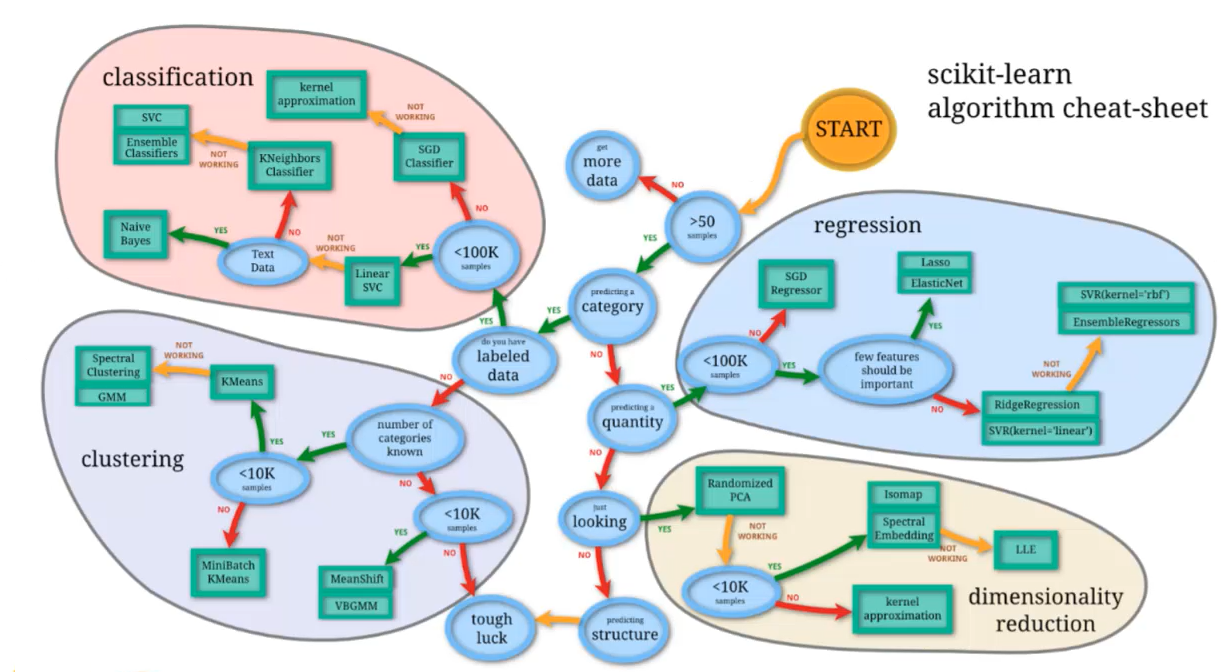